In [59]:
from sklearn.model_selection import train_test_split
# ^^^ pyforest auto-imports - don't write above this line
train=pd.read_csv('train_Agriculture.csv')
test=pd.read_csv('test_Agriculture.csv')

In [60]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [61]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [62]:
train.shape,test.shape

((88858, 10), (59310, 9))

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [67]:
train['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [6]:
train['Number_Weeks_Used'].isnull().sum()/train.shape[0]

0.10128519660582053

In [7]:
train['Number_Weeks_Used'].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

In [8]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns 

In [9]:
missing_values_table(train)

Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Number_Weeks_Used,9000,10.1


In [10]:
missing_values_table(test)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Number_Weeks_Used,5893,9.9


In [11]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [12]:
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)


In [13]:
cat=list(train.select_dtypes(exclude='O').columns)

In [14]:
cat.remove('Estimated_Insects_Count')

In [15]:
cat

['Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Season',
 'Crop_Damage']

In [16]:
num='Estimated_Insects_Count'

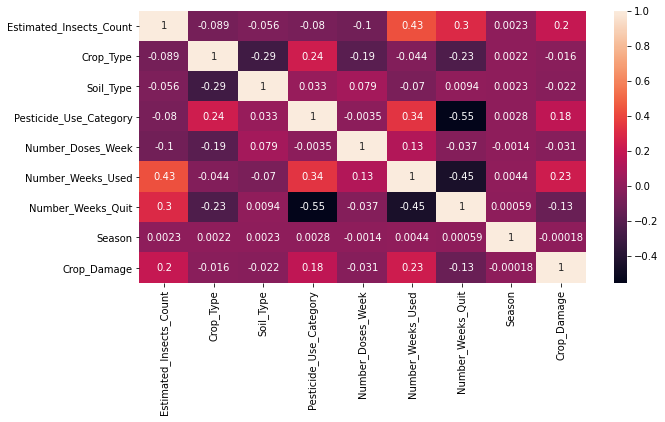

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)

In [18]:
from scipy.stats import chi2_contingency
for i in cat:
    if i!='Crop_Damage':
        p_value = chi2_contingency(pd.crosstab(train["Crop_Damage"],train[i]))
        print('p_value of Crop_Damage with',i,'is',p_value[1])

p_value of Crop_Damage with Crop_Type is 3.3787790720194964e-17
p_value of Crop_Damage with Soil_Type is 1.9298029277753024e-10
p_value of Crop_Damage with Pesticide_Use_Category is 0.0
p_value of Crop_Damage with Number_Doses_Week is 0.0
p_value of Crop_Damage with Number_Weeks_Used is 0.0
p_value of Crop_Damage with Number_Weeks_Quit is 0.0
p_value of Crop_Damage with Season is 0.11974800361205014


Crop_Type


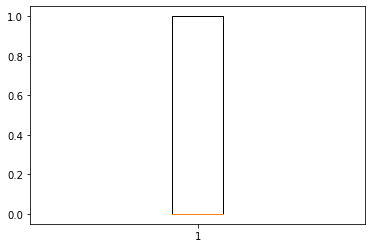

Soil_Type


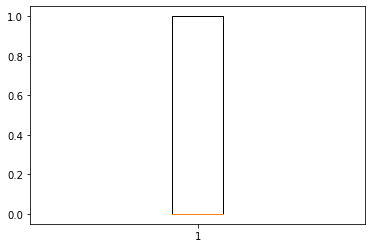

Pesticide_Use_Category


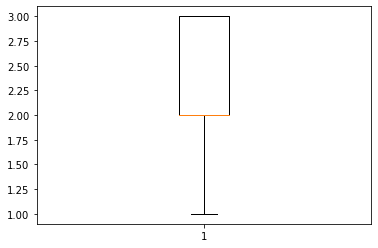

Number_Doses_Week


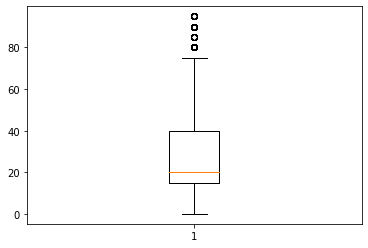

Number_Weeks_Used


C:\Users\BramboArmy\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\BramboArmy\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\BramboArmy\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\BramboArmy\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


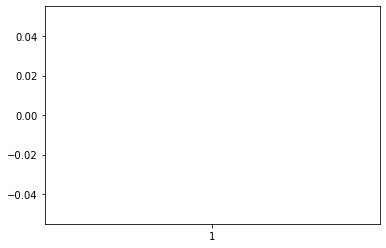

Number_Weeks_Quit


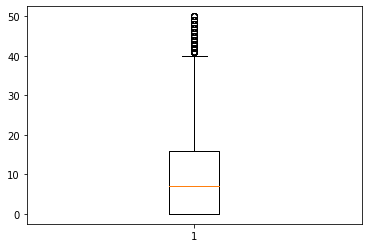

Season


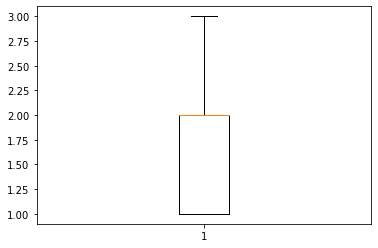

Crop_Damage


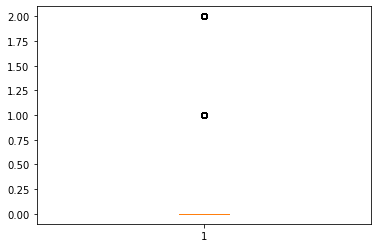

In [19]:
for i in cat:
    plt.boxplot(train[i])
    print(i)
    plt.show()


In [20]:
## Number of weeks quit having the outliers


Crop_Type


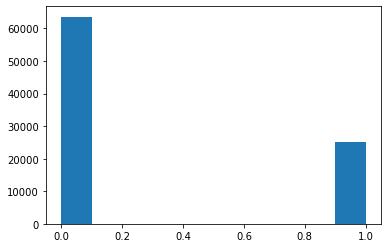

Soil_Type


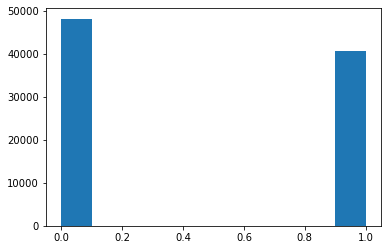

Pesticide_Use_Category


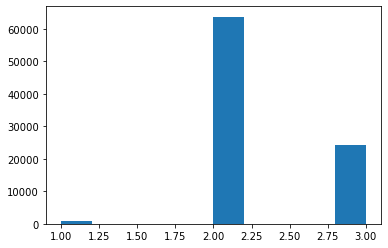

Number_Doses_Week


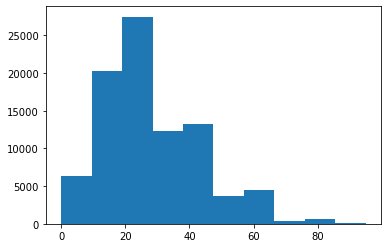

C:\Users\BramboArmy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\BramboArmy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Number_Weeks_Used


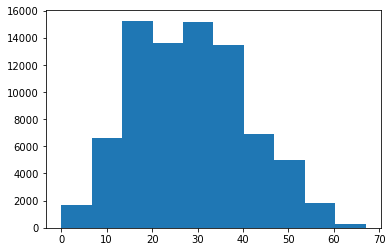

Number_Weeks_Quit


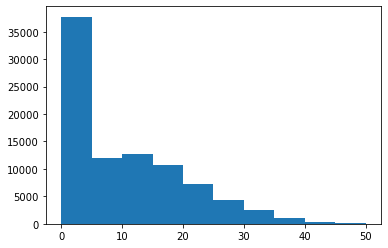

Season


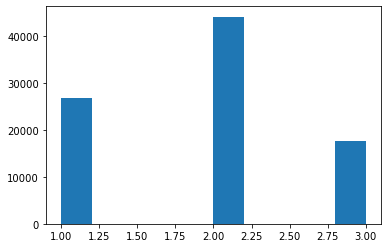

Crop_Damage


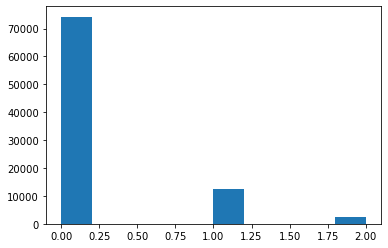

In [21]:
for i in cat:
    plt.hist(train[i])
    print(i)
    plt.show()

In [22]:
train['Number_Weeks_Used'].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

In [23]:
train[num].skew()

0.8391456380125325

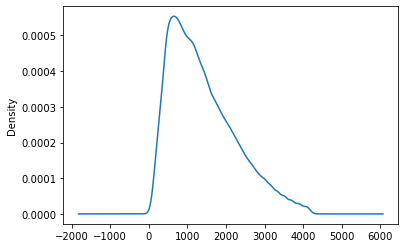

In [24]:
train[num].plot(kind='density')

In [25]:
train['Estimated_Insects_Count']=train['Estimated_Insects_Count'].transform(lambda x:x**0.5)

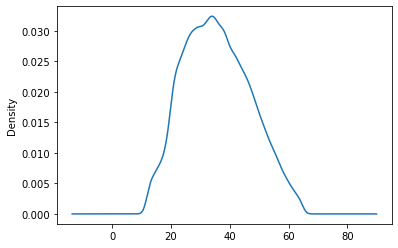

In [26]:
train['Estimated_Insects_Count'].plot(kind='density')

Crop_Type Vs Estimated_Insects_Count


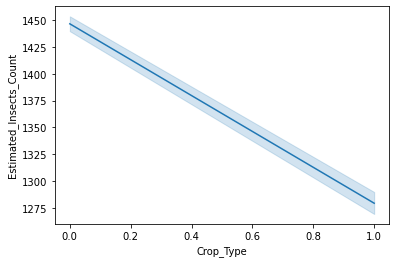

Soil_Type Vs Estimated_Insects_Count


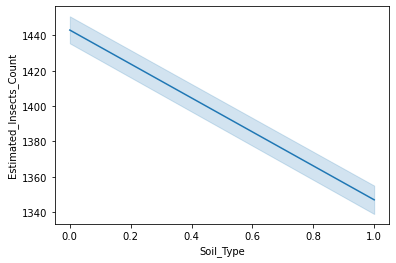

Pesticide_Use_Category Vs Estimated_Insects_Count


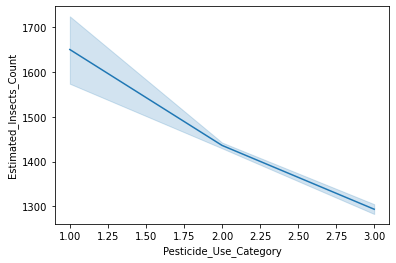

Number_Doses_Week Vs Estimated_Insects_Count


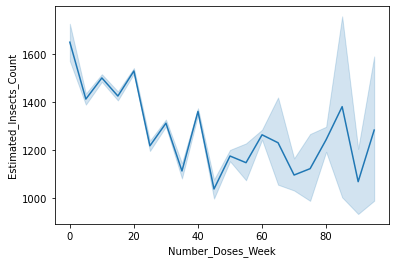

Number_Weeks_Used Vs Estimated_Insects_Count


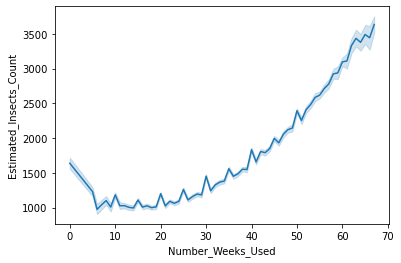

Number_Weeks_Quit Vs Estimated_Insects_Count


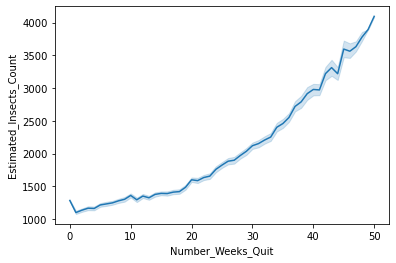

Season Vs Estimated_Insects_Count


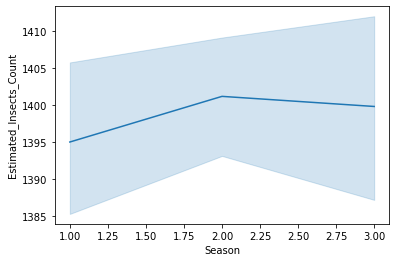

Crop_Damage Vs Estimated_Insects_Count


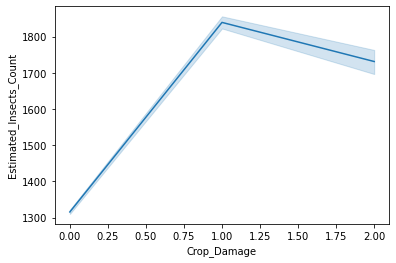

In [68]:
for i in cat:
    sns.lineplot(train[i],train[num])
    print(i,'Vs',num)
    plt.show()

In [28]:
## From above charts we can see that if you are using Pesticide, the num of insects count will decrease
##

In [29]:
train['Number_Weeks_Used']=train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mode()[0])

In [30]:
test['Number_Weeks_Used']=test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mode()[0])

In [31]:
train['Estimated_Insects_Count'].skew()

0.23392024554735977

In [32]:
train['Estimated_Insects_Count']=train['Estimated_Insects_Count'].transform(lambda x:x**0.5)

In [33]:
train['Estimated_Insects_Count'].skew()

-0.10615663678549725

In [34]:
X=train.drop(['Crop_Damage','Season'],axis=1)
y=train['Crop_Damage']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<IPython.core.display.Javascript object>

In [69]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from scipy.stats import randint
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

print('auc:{}'.format(np.mean(auc_lst)))

labels = ['Not promoted', 'Promoted','do']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

In [37]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     
                     ('lr',LogisticRegression())])

In [38]:
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     
                     ('dt',DecisionTreeClassifier())])

In [39]:
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     
                     ('rfc',RandomForestClassifier())])

In [40]:
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     
                     ('knn',KNN())])

In [41]:
pipeline_xgbc=Pipeline([('scalar5',StandardScaler()),
                     
                     ('xgboost',XGBClassifier())])

In [42]:
pipeline_lgbc=Pipeline([('scalar6',StandardScaler()),
                    
                     ('lgbc',lgb.LGBMClassifier())])

In [43]:
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     
                     ('adaboost',AdaBoostClassifier())])

In [44]:
pipeline_sgdc=Pipeline([('scalar8',StandardScaler()),
                     
                     ('sgradient',SGDClassifier())])

In [45]:
pipeline_nb=Pipeline([('scalar8',StandardScaler()),
                    
                     ('nb',GaussianNB())])

In [46]:
pipeline_svc=Pipeline([('scalar9',StandardScaler()),
                    
                     ('svc',SVC())])

In [47]:
pipeline_extratree=Pipeline([('scalar10',StandardScaler()),
                     
                     ('extratree',ExtraTreesClassifier())])

In [48]:
# Lets make the list of pipelines

In [49]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_lgbc,pipeline_ada,pipeline_sgdc,pipeline_nb,pipeline_svc,pipeline_extratree]

In [50]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [51]:
pipe_dict={0:'Logistic Regression',1:'Decision Tree',2:'Random Forest',3:'KNN',4:'XGBC',5:'LGBC',6:'ADA',7:'SGDC',8:'NB',9:'SVC',10:'ExtraTree'}

In [52]:
y

0        0
1        1
2        1
3        1
4        1
        ..
88853    0
88854    0
88855    0
88856    0
88857    0
Name: Crop_Damage, Length: 88858, dtype: int64

In [53]:
smote = SMOTE(random_state=3)

In [54]:

y.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [55]:
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

C:\Users\BramboArmy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\BramboArmy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(149217, 7) (149217,)


tpot = TPOTClassifier(verbosity=2, max_time_mins=2, max_eval_time_mins=0.04, population_size=40)
tpot.fit(X_sm, y_sm)
tpot.score(X_test, y_test)

In [56]:
for i in pipelines:
    i.fit(X_sm,y_sm)
    predictions=i.predict(X_test)
    print('Classification Report : \n',(classification_report(y_test,predictions)))

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.61      0.74     24499
           1       0.17      0.24      0.20      4054
           2       0.07      0.64      0.13       771

    accuracy                           0.56     29324
   macro avg       0.38      0.50      0.35     29324
weighted avg       0.79      0.56      0.65     29324

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.56      0.68     24499
           1       0.17      0.34      0.23      4054
           2       0.03      0.21      0.06       771

    accuracy                           0.52     29324
   macro avg       0.35      0.37      0.32     29324
weighted avg       0.74      0.52      0.60     29324

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.61      0.72     24499
           1       0.19      0.37      0.25      40

In [57]:
for i,model in enumerate(pipelines):
    print('{} Test Accuracy {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy 0.5635656799890875
Decision Tree Test Accuracy 0.5247578775064793
Random Forest Test Accuracy 0.5684763333788023
KNN Test Accuracy 0.5809575774109944
XGBC Test Accuracy 0.6140703860319192
LGBC Test Accuracy 0.6306438412222071
ADA Test Accuracy 0.6109330241440458
SGDC Test Accuracy 0.5713749829491201
NB Test Accuracy 0.5910516982676306
SVC Test Accuracy 0.5634292729504843


In [58]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_classifier=i
        best_pipeline=model
print("Classifier with best accuracy:{}".format(pipe_dict[best_classifier]))

Classifier with best accuracy:LGBC


smote = SMOTE('auto')

X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

tpot = TPOTClassifier(verbosity=2, max_time_mins=2, max_eval_time_mins=0.04, population_size=40)
tpot.fit(X_sm, y_sm)
tpot.score(X_test, y_test)

for i in pipelines:
    i.fit(X_sm,y_sm)
    predictions=i.predict(X_test)
    print('Classification Report : \n',(classification_report(y_test,predictions)))

for i,model in enumerate(pipelines):
    print('{} Test Accuracy {}'.format(pipe_dict[i],model.score(X_test,y_test)))

for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_classifier=i
        best_pipeline=model
print("Classifier with best accuracy:{}".format(pipe_dict[best_classifier]))
